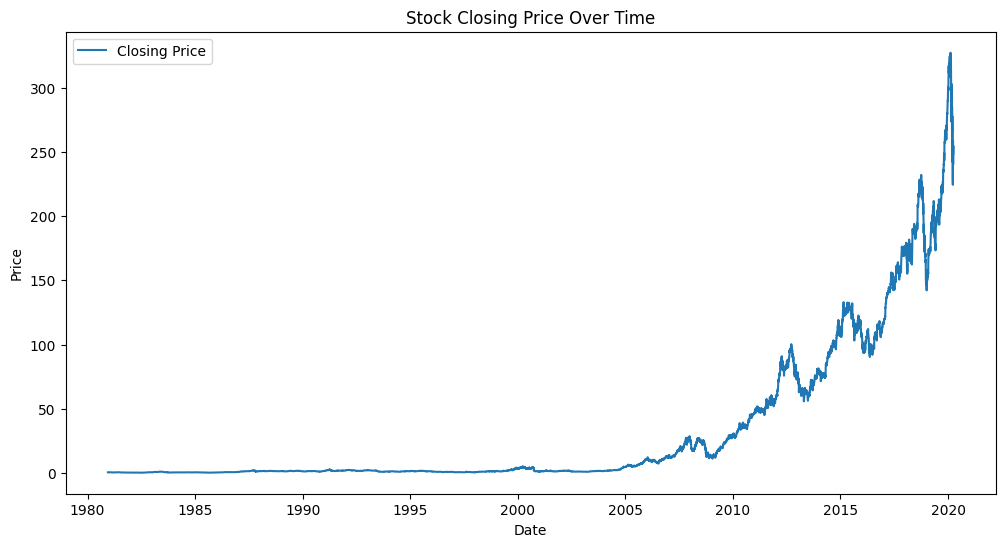

ADF Statistic: 1.8939738468260874
p-value: 0.9985182618845982
Critical Values: {'1%': -3.4310126482982626, '5%': -2.861832850708558, '10%': -2.5669258793000673}
The series is NOT stationary.
ADF Statistic: -15.35534480646786
p-value: 3.673144669580859e-28
Critical Values: {'1%': -3.4310126482982626, '5%': -2.861832850708558, '10%': -2.5669258793000673}
The series is stationary.


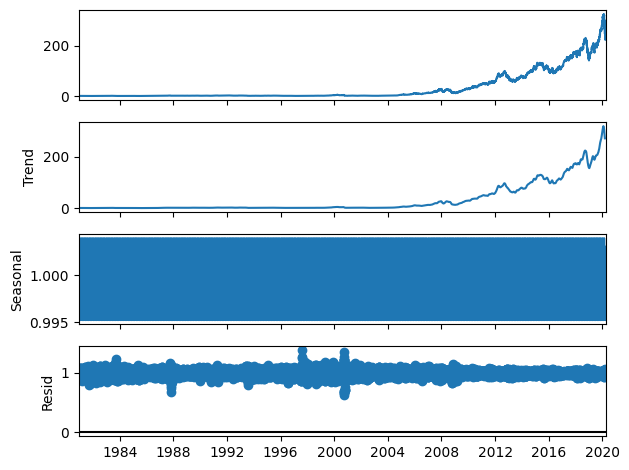

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9909
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16765.491
Date:                Fri, 14 Feb 2025   AIC                          33542.981
Time:                        11:09:28   BIC                          33586.188
Sample:                             0   HQIC                         33557.613
                               - 9909                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1762      0.002    -96.123      0.000      -0.180      -0.173
ar.L2          0.0049      0.002      3.157      0.002       0.002       0.008
ar.L3          0.0163      0.002      7.765      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


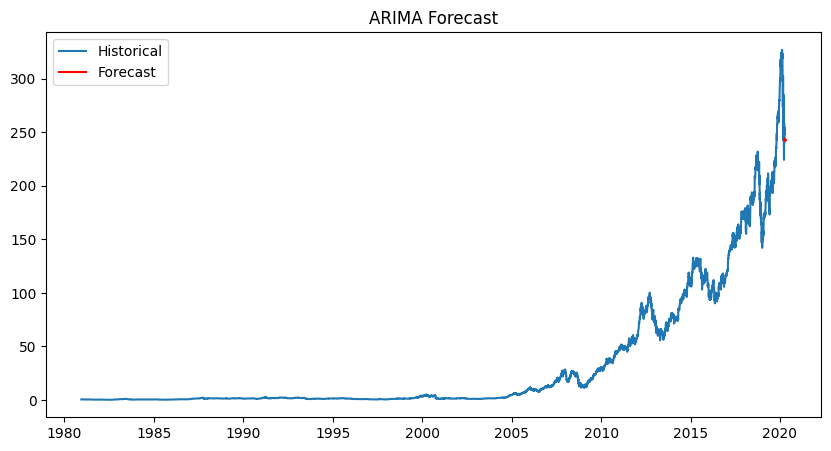

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarni

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80188D+00    |proj g|=  1.96338D-01

At iterate    5    f=  1.71763D+00    |proj g|=  6.61567D-02

At iterate   10    f=  1.69559D+00    |proj g|=  1.96459D-02

At iterate   15    f=  1.69164D+00    |proj g|=  2.06517D-03

At iterate   20    f=  1.69142D+00    |proj g|=  3.51089D-04

At iterate   25    f=  1.69142D+00    |proj g|=  2.29960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


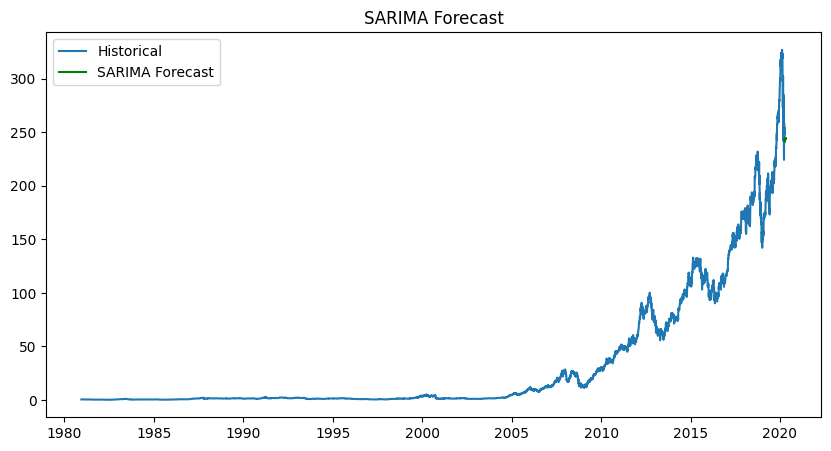

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv("../dataset/stocks/AAPL.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df = df[['Close']]

# Plot time series
def plot_series(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df, label="Closing Price")
    plt.title("Stock Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

plot_series(df)

# Check stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

adf_test(df['Close'])

# Differencing to make data stationary
df_diff = df.diff().dropna()
adf_test(df_diff['Close'])

# Seasonal decomposition
result = seasonal_decompose(df, model='multiplicative', period=30)
result.plot()
plt.show()

# Fit ARIMA model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(df, label='Historical')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Fit SARIMA model (Seasonal ARIMA)
model_sarima = SARIMAX(df, order=(2,1,2), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

# SARIMA Forecast
sarima_forecast = model_sarima_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(df, label='Historical')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()